In [3]:
# from grid import *
# from HLL import *
# from rk import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm.notebook import tqdm

%matplotlib widget

In [4]:
n_points    = 100
dim         = 2
n_vars      = 2+dim
dx          = 1/n_points
gamma       = 1.4
dt          = 0.001

U = grid(dim,n_points,n_vars)

# Set up initial conditions
# U[0][:n_points//2]  = 1.000
# U[0][n_points//2:]  = 0.100
# U[2][:n_points//2]  = 1.000/(gamma-1)
# U[2][n_points//2:]  = 0.125/(gamma-1)

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

mask = create_circular_mask(*U[0].shape,radius=n_points*1/4)

U[0] [:] = 0.1
U[0] [n_points//3:(2*n_points)//3,n_points//3:(2*n_points)//4] = 1.00
# U[0] [mask] = 1.00
U[-1][:] = 0.125/(gamma-1)
U[-1][n_points//3:(2*n_points)//3,n_points//3:(2*n_points)//4] = 1.00/(gamma-1)
# U[-1] [mask] = 1.00/(gamma-1)

NameError: name 'grid' is not defined

In [3]:
# def step(U,dt,dx,gamma):
#     return [u + dt* L for u, L in zip(U,HLL_div(U, gamma, dx))]

In [4]:
Us = [U]
FRAMES = 500
for i in tqdm(range(FRAMES)): Us.append(step(Us[-1], dt, HLL_div, gamma ,dx))

  0%|          | 0/500 [00:00<?, ?it/s]

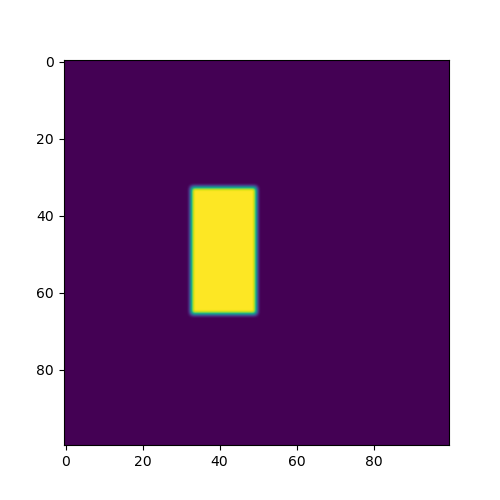

In [5]:
# PLOT AS ANIMATION
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111)

# line, = ax.plot(np.linspace(0,1,n_points), Us[0][0])
show = ax.imshow(Us[0][0],interpolation='bicubic',cmap='viridis')
# ax.set_xlim(0,1)
# ax.set_ylim(0,1.1*U[0][0])

def update(frame):
    # line.set_ydata(Us[frame][0])
    show.set_array(Us[frame][0])

    return show,

animation = FuncAnimation(fig=fig,func=update, frames=FRAMES, interval=1,blit=True)
plt.show()

In [6]:
# Q = [get_quantities(u,gamma) for u in Us]
# E = [q[-2] for q in Q]

In [7]:
# plt.figure()
# plt.plot([np.max(e) for e in E])
# plt.show()